In [1]:
import pandas as pd
import re
import nltk
import spacy
from nlp_preprocessing import preprocessing_text, preprocessing_tokens, pos_cleaning, stopwords_to_add
from leia import SentimentIntensityAnalyzer
from sentiment_analysis import polarity_leiA, polarity_oplexicon, get_sentiment, groups_analysis, calculate_bank_score
from topic_modeling import topic_modeling, creat_wordcloud
from wordcloud import STOPWORDS

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("portuguese")
stopwords.extend(stopwords_to_add)
stopwords = set(stopwords)

nlp = spacy.load("pt_core_news_lg")

In [3]:
df = pd.read_csv("path/dataset_raw.csv", sep = ";")

In [4]:
df = preprocessing_text(df, "tweet_original_text", "clean_text")
df["clean_tokens"] = df["clean_text"].apply(lambda x: preprocessing_tokens(x, stopwords, nlp))
df = pos_cleaning(df, "clean_tokens", "clean_tokens")
df

tweet_id          tweet_created_at     bank  \
0      1576401417815760897  2022-10-02T02:39:20.000Z    @itau   
1      1576396586585796608  2022-10-02T02:20:08.000Z    @itau   
2      1576378686018064384  2022-10-02T01:09:01.000Z    @itau   
3      1576374920401289216  2022-10-02T00:54:03.000Z    @itau   
4      1576370683864485888  2022-10-02T00:37:13.000Z    @itau   
...                    ...                       ...      ...   
10483  1573921447180873729  2022-09-25T06:24:49.000Z  @nubank   
10484  1573879933159542784  2022-09-25T03:39:51.000Z  @nubank   
10485  1573873042861817858  2022-09-25T03:12:29.000Z  @nubank   
10486  1573869481130184707  2022-09-25T02:58:20.000Z  @nubank   
10487  1573857461345390592  2022-09-25T02:10:34.000Z  @nubank   

                                     tweet_original_text  \
0      .@Clarobrasil, favor reembolsar a recarga q eu...   
1      Já odeio o @sgtalexandre por ter me mandado SM...   
2      eu tava dando uma fuçada hj no @itau shop e a ...   
3          Eu odeio o Itaú, pior banco do mundo !\n@itau   
4      Eu não sei como, mas se vira @duiliomalves, pe...   
...                                                  ...   
10483  Aviso de fatura fechada chega direitinho, sem ...   
10484   A @nubank soca no meu cu https://t.co/C5QOKRzBDo   
10485  Clonaram meu cartão e agora tão tentando fazer...   
10486  MANOOOOOOO OLHA O VENENO!!! acabaram de compra...   
10487  A compra foi cancelada um tempão e nada do @nu...   

                                              clean_text  \
0      .clarobrasil, favor reembolsar a recarga que e...   
1      já odeio o sgtalexandre por ter me mandado sms...   
2      eu tava dando uma fuçada hoje no itau shop e a...   
3            eu odeio o itaú, pior banco do mundo ! itau   
4      eu não sei como, mas se vira duiliomalves, peg...   
...                                                  ...   
10483  aviso de fatura fechada chega direitinho, sem ...   
10484                           a nubank soca no meu cu    
10485  clonaram meu cartão e agora estão tentando faz...   
10486  manooooooo olha o veneno!!! acabaram de compra...   
10487  a compra foi cancelada um tempo e nada do nuba...   

                                            clean_tokens  
0      [clarobrasil, favor, reembolsar, recarga, fiz,...  
1      [odiar, sgtalexandre, ter, mandar, sms, funcio...  
2      [dar, fuçada, hoje, shop, ideia, agradar, ter,...  
3                                   [odiar, pior, mundo]  
4      [saber, virar, duiliomalves, pegar, dinheiro, ...  
...                                                  ...  
10483  [aviso, fatura, fechar, chegar, direitinho, fa...  
10484                                        [socar, cu]  
10485  [clonar, cartão, tentar, fazer, compras, valor...  
10486  [manooooooo, olhar, veneno, acabar, comprar, m...  
10487  [compra, cancelar, tempo, nada, realizar, reem...  

[10488 rows x 6 columns]

In [5]:
df[["bank","tweet_id"]].groupby("bank").count().rename({"tweet_id":"count"}, axis = 1).sort_values("count", ascending = False)

count
bank                 
@nubank          2921
@itau            1875
@C6Bank          1159
@santander_br    1047
@bancointer       993
@Bradesco         791
@BancodoBrasil    713
@falanext         395
@bancopan         297
@timeneon         168
@meudigio         129

### Analise de Sentimento LeiA

In [7]:
s = SentimentIntensityAnalyzer()
df_leia = df.copy()
df_leia["polarity"] = df_leia["clean_text"].apply(lambda x: polarity_leiA(x, s))
df_leia["sentiment"]  = df_leia["polarity"].apply(lambda x: get_sentiment(x))
df_leia

tweet_id          tweet_created_at     bank  \
0      1576401417815760897  2022-10-02T02:39:20.000Z    @itau   
1      1576396586585796608  2022-10-02T02:20:08.000Z    @itau   
2      1576378686018064384  2022-10-02T01:09:01.000Z    @itau   
3      1576374920401289216  2022-10-02T00:54:03.000Z    @itau   
4      1576370683864485888  2022-10-02T00:37:13.000Z    @itau   
...                    ...                       ...      ...   
10483  1573921447180873729  2022-09-25T06:24:49.000Z  @nubank   
10484  1573879933159542784  2022-09-25T03:39:51.000Z  @nubank   
10485  1573873042861817858  2022-09-25T03:12:29.000Z  @nubank   
10486  1573869481130184707  2022-09-25T02:58:20.000Z  @nubank   
10487  1573857461345390592  2022-09-25T02:10:34.000Z  @nubank   

                                     tweet_original_text  \
0      .@Clarobrasil, favor reembolsar a recarga q eu...   
1      Já odeio o @sgtalexandre por ter me mandado SM...   
2      eu tava dando uma fuçada hj no @itau shop e a ...   
3          Eu odeio o Itaú, pior banco do mundo !\n@itau   
4      Eu não sei como, mas se vira @duiliomalves, pe...   
...                                                  ...   
10483  Aviso de fatura fechada chega direitinho, sem ...   
10484   A @nubank soca no meu cu https://t.co/C5QOKRzBDo   
10485  Clonaram meu cartão e agora tão tentando fazer...   
10486  MANOOOOOOO OLHA O VENENO!!! acabaram de compra...   
10487  A compra foi cancelada um tempão e nada do @nu...   

                                              clean_text  \
0      .clarobrasil, favor reembolsar a recarga que e...   
1      já odeio o sgtalexandre por ter me mandado sms...   
2      eu tava dando uma fuçada hoje no itau shop e a...   
3            eu odeio o itaú, pior banco do mundo ! itau   
4      eu não sei como, mas se vira duiliomalves, peg...   
...                                                  ...   
10483  aviso de fatura fechada chega direitinho, sem ...   
10484                           a nubank soca no meu cu    
10485  clonaram meu cartão e agora estão tentando faz...   
10486  manooooooo olha o veneno!!! acabaram de compra...   
10487  a compra foi cancelada um tempo e nada do nuba...   

                                            clean_tokens  polarity sentiment  
0      [clarobrasil, favor, reembolsar, recarga, fiz,...    0.6696  positivo  
1      [odiar, sgtalexandre, ter, mandar, sms, funcio...   -0.6662  negativo  
2      [dar, fuçada, hoje, shop, ideia, agradar, ter,...    0.0000    neutro  
3                                   [odiar, pior, mundo]   -0.8932  negativo  
4      [saber, virar, duiliomalves, pegar, dinheiro, ...    0.3274  positivo  
...                                                  ...       ...       ...  
10483  [aviso, fatura, fechar, chegar, direitinho, fa...   -0.3818  negativo  
10484                                        [socar, cu]    0.0000    neutro  
10485  [clonar, cartão, tentar, fazer, compras, valor...    0.4738  positivo  
10486  [manooooooo, olhar, veneno, acabar, comprar, m...    0.2905  positivo  
10487  [compra, cancelar, tempo, nada, realizar, reem...   -0.1531  negativo  

[10488 rows x 8 columns]

In [9]:
cols = ["bank","sentiment","polarity"]
group_cols = ["bank","sentiment"]
banks_analysis_leia = groups_analysis(df_leia, cols, group_cols)
banks_analysis_leia = calculate_bank_score(banks_analysis_leia)
banks_analysis_leia

sentiment        negativo     neutro   positivo  bank_score
bank                                                       
@BancodoBrasil  53.997195  18.373072  27.629734  -26.367461
@Bradesco       62.705436  16.687737  20.606827  -42.098609
@C6Bank         62.122519  13.546160  24.331320  -37.791199
@bancointer     53.977845  20.342397  25.679758  -28.298087
@bancopan       67.340067  14.478114  18.181818  -49.158249
@falanext       63.797468  14.430380  21.772152  -42.025316
@itau           58.400000  20.213333  21.386667  -37.013333
@meudigio       55.813953  23.255814  20.930233  -34.883721
@nubank         51.078398  24.135570  24.786032  -26.292366
@santander_br   62.273161  12.702961  25.023878  -37.249284
@timeneon       64.285714  19.642857  16.071429  -48.214286

In [10]:
banks_analysis_leia.sort_values("bank_score", ascending = False)

sentiment        negativo     neutro   positivo  bank_score
bank                                                       
@nubank         51.078398  24.135570  24.786032  -26.292366
@BancodoBrasil  53.997195  18.373072  27.629734  -26.367461
@bancointer     53.977845  20.342397  25.679758  -28.298087
@meudigio       55.813953  23.255814  20.930233  -34.883721
@itau           58.400000  20.213333  21.386667  -37.013333
@santander_br   62.273161  12.702961  25.023878  -37.249284
@C6Bank         62.122519  13.546160  24.331320  -37.791199
@falanext       63.797468  14.430380  21.772152  -42.025316
@Bradesco       62.705436  16.687737  20.606827  -42.098609
@timeneon       64.285714  19.642857  16.071429  -48.214286
@bancopan       67.340067  14.478114  18.181818  -49.158249

### WordCloud e Topic Modeling

#### LeiA

In [11]:
df_leia_positivo = df_leia[df_leia["sentiment"] == "positivo"]
df_leia_negativo = df_leia[df_leia["sentiment"] == "negativo"]

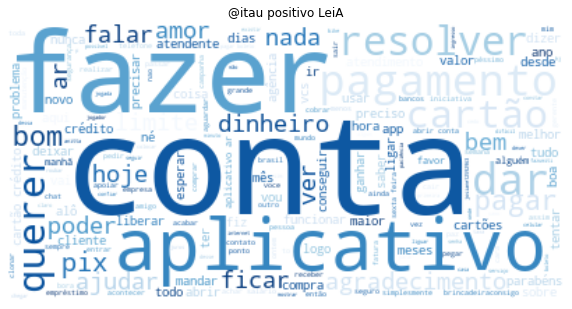

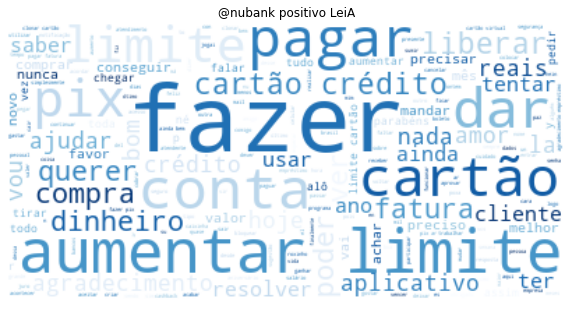

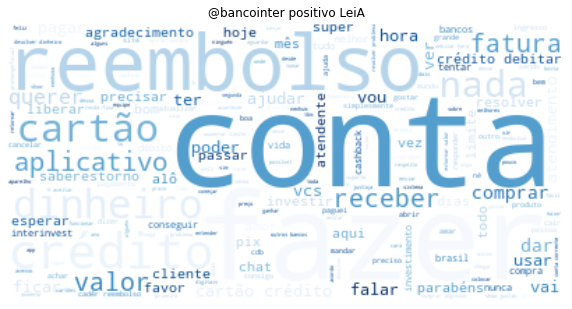

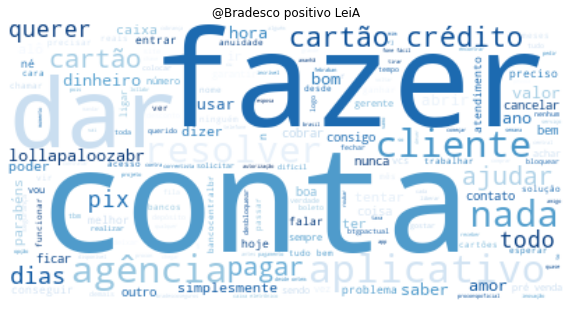

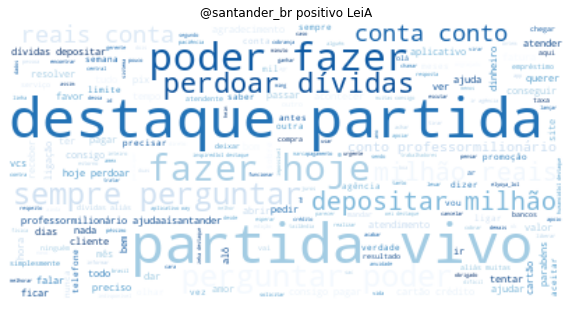

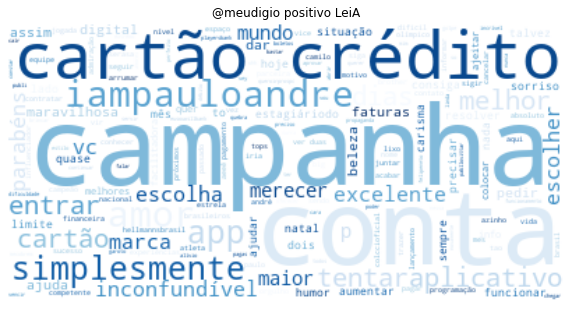

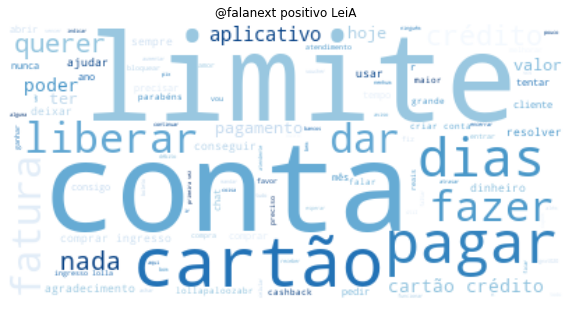

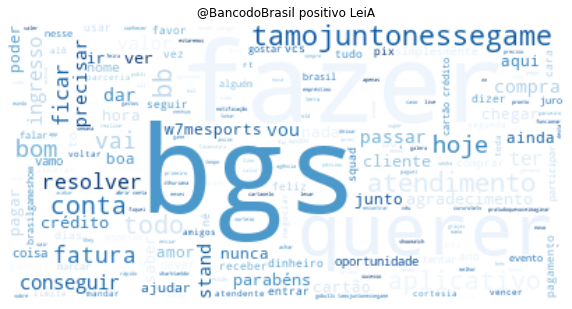

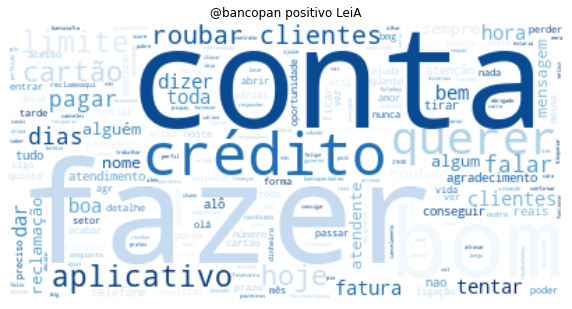

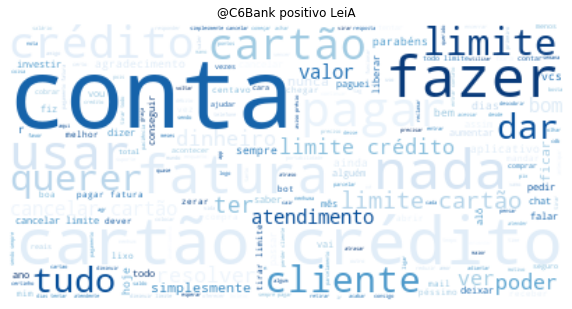

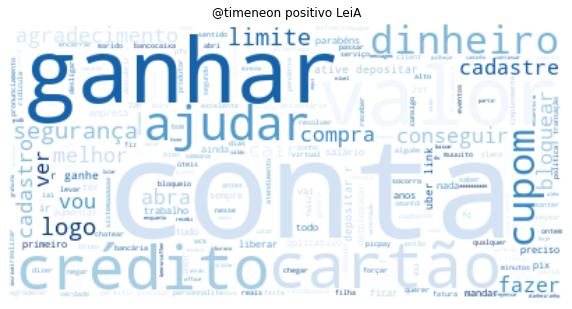

In [12]:
for bank in df_leia_positivo["bank"].unique():
    creat_wordcloud(df_leia, bank, "positivo", "Blues", stopwords, "LeiA")

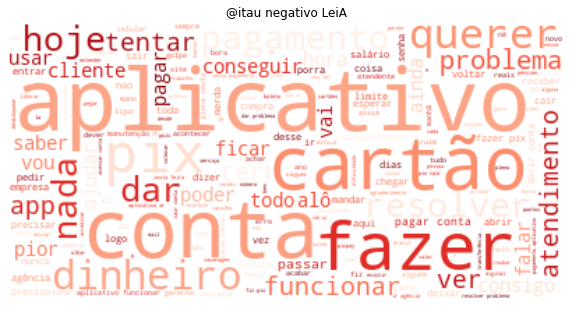

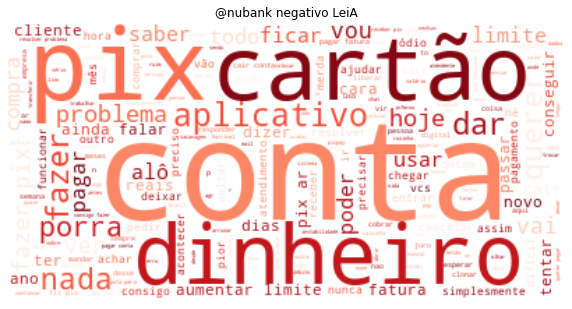

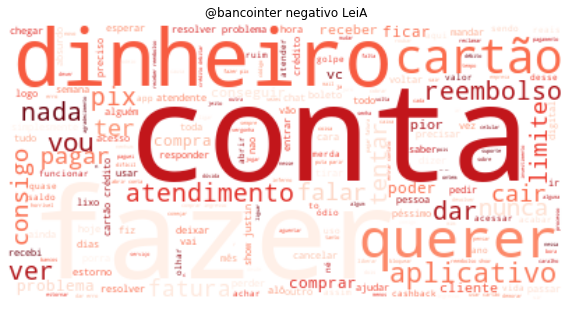

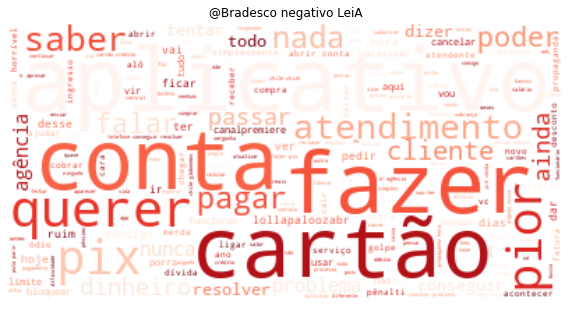

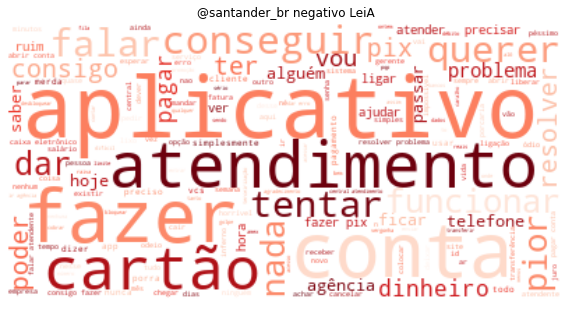

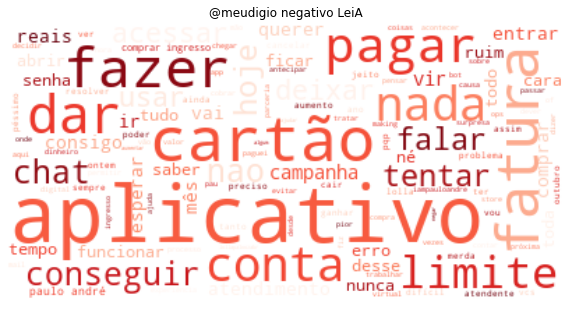

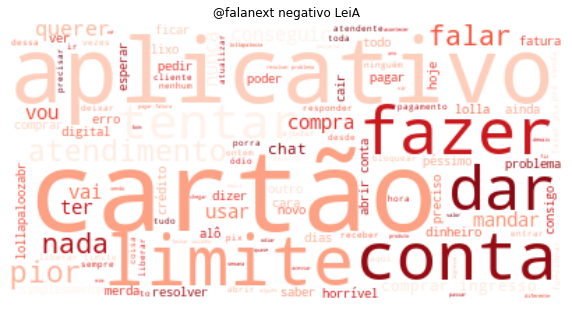

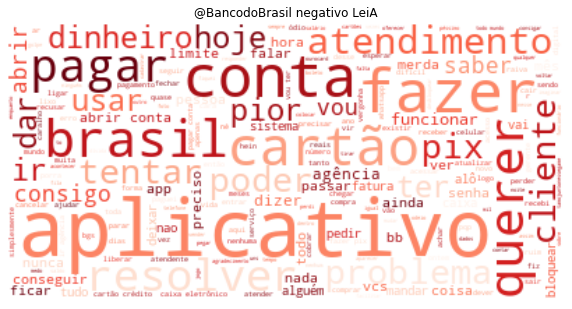

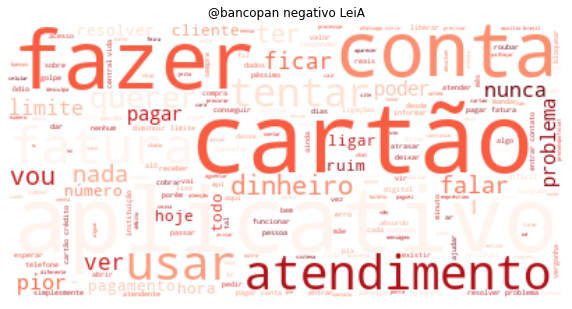

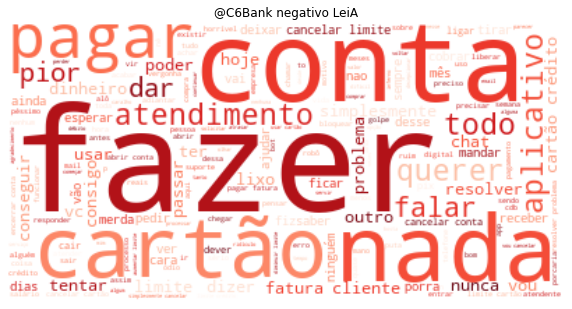

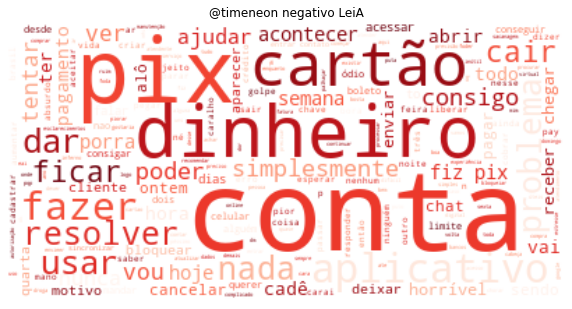

In [13]:
for bank in df_leia_negativo["bank"].unique():
    creat_wordcloud(df_leia, bank, "negativo", "Reds", stopwords, "LeiA")

In [16]:
num_topics = 2
for bank in df_leia_positivo["bank"].unique():
    topic_modeling(df_leia, bank, "positivo", num_topics)

@itau:positivo
 
[(0,
  '0.013*"fazer" + 0.010*"aplicativo" + 0.008*"conta" + 0.008*"ar" + '
  '0.008*"pagamento" + 0.008*"resolver" + 0.007*"cartão" + 0.006*"pix" + '
  '0.005*"agradecimento" + 0.005*"parabéns"'),
 (1,
  '0.012*"aplicativo" + 0.010*"conta" + 0.008*"cartão" + 0.007*"dar" + '
  '0.007*"pagar" + 0.006*"querer" + 0.006*"fazer" + 0.005*"nada" + '
  '0.005*"amor" + 0.005*"bom"')]
@nubank:positivo
 
[(0,
  '0.016*"limite" + 0.010*"aumentar" + 0.009*"cartão" + 0.008*"pagar" + '
  '0.008*"fazer" + 0.007*"dar" + 0.006*"ver" + 0.006*"crédito" + 0.006*"pix" + '
  '0.005*"conta"'),
 (1,
  '0.021*"cartão" + 0.013*"limite" + 0.012*"fazer" + 0.011*"pix" + '
  '0.011*"crédito" + 0.009*"aumentar" + 0.008*"pagar" + 0.008*"conta" + '
  '0.007*"liberar" + 0.006*"dar"')]
@bancointer:positivo
 
[(0,
  '0.013*"crédito" + 0.011*"conta" + 0.010*"cartão" + 0.008*"reembolso" + '
  '0.007*"valor" + 0.007*"comprar" + 0.007*"fazer" + 0.007*"receber" + '
  '0.006*"dinheiro" + 0.006*"nada"'),
 (1,
  

In [17]:
num_topics = 2
for bank in df_leia_negativo["bank"].unique():
    topic_modeling(df_leia, bank, "negativo", num_topics)

@itau:negativo
 
[(0,
  '0.015*"aplicativo" + 0.013*"pix" + 0.012*"fazer" + 0.010*"pagar" + '
  '0.009*"pagamento" + 0.009*"cartão" + 0.009*"conta" + 0.008*"problema" + '
  '0.007*"resolver" + 0.006*"funcionar"'),
 (1,
  '0.021*"conta" + 0.020*"aplicativo" + 0.012*"cartão" + 0.010*"fazer" + '
  '0.007*"abrir" + 0.007*"pagar" + 0.006*"dar" + 0.006*"pix" + '
  '0.006*"pagamento" + 0.006*"ar"')]
@nubank:negativo
 
[(0,
  '0.019*"pix" + 0.013*"conta" + 0.012*"pagar" + 0.011*"fazer" + '
  '0.011*"aplicativo" + 0.011*"dinheiro" + 0.010*"limite" + 0.010*"cartão" + '
  '0.007*"nada" + 0.006*"vai"'),
 (1,
  '0.024*"pix" + 0.019*"fazer" + 0.015*"conta" + 0.011*"dar" + 0.010*"cartão" '
  '+ 0.009*"dinheiro" + 0.008*"pagar" + 0.008*"cair" + 0.008*"querer" + '
  '0.008*"fatura"')]
@bancointer:negativo
 
[(0,
  '0.013*"conta" + 0.012*"fazer" + 0.010*"cartão" + 0.010*"querer" + '
  '0.009*"dinheiro" + 0.009*"reembolso" + 0.007*"resolver" + 0.007*"vou" + '
  '0.006*"problema" + 0.006*"aplicativo"'),
 